<a href="https://colab.research.google.com/github/Gaeli75/Deep-Learning-Pratices-1/blob/main/DEEP_LEARNING_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

In [7]:
import numpy as np



In [8]:
import matplotlib.pyplot as plt
%matplotlib inline



In [9]:
import torch
from torch import nn


In [10]:
df = pd.read_csv('used_cars.csv')

In [11]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [12]:
price = df['price']
price = price.str.replace('$','')
price = price.str.replace(',','')
price = price.astype(int)

In [13]:
price

,price
0,10300
1,38005
2,54598
3,15500
4,34999
...,...
4004,349950
4005,53900
4006,90998
4007,62999


In [14]:
milage = df['milage']
milage = milage.str.replace(' mi.','')
milage = milage.str.replace(',','')
milage = milage.astype(int)

In [15]:
age = df['model_year'].max() - df['model_year']
print(age)

0       11
1        3
2        2
3        9
4        3
        ..
4004     1
4005     2
4006     2
4007     4
4008     4
Name: model_year, Length: 4009, dtype: int64


In [16]:
df['accident'].unique()

array(['At least 1 accident or damage reported', 'None reported', nan],
      dtype=object)

In [17]:
accident_free = df["accident"] == "None reported"
accident_free = accident_free.astype(int)
print(accident_free)

0       0
1       0
2       1
3       1
4       1
       ..
4004    1
4005    1
4006    1
4007    1
4008    0
Name: accident, Length: 4009, dtype: int64


In [18]:
age.head()

,model_year
0,11
1,3
2,2
3,9
4,3


In [19]:
#puttting the millage data


In [20]:
X = torch.stack([torch.tensor(milage, dtype=torch.float32, ),
                 torch.tensor(age, dtype=torch.float32),
                 torch.tensor(accident_free, dtype=torch.float32)], dim = 1)


In [21]:
print(X)


tensor([[5.1000e+04, 1.1000e+01, 0.0000e+00],
        [3.4742e+04, 3.0000e+00, 0.0000e+00],
        [2.2372e+04, 2.0000e+00, 1.0000e+00],
        ...,
        [2.1160e+03, 2.0000e+00, 1.0000e+00],
        [3.3000e+04, 4.0000e+00, 1.0000e+00],
        [4.3000e+04, 4.0000e+00, 0.0000e+00]])


In [22]:
print(X.shape)

torch.Size([4009, 3])


In [23]:
Y = torch.tensor(price, dtype=torch.float32).reshape(-1, 1)

In [24]:
X_mean = X.mean(dim=0)
X_std = X.std(dim=0)

In [25]:
X = (X - X_mean) / X_std

In [26]:
print(X)

tensor([[-0.2623,  0.4121, -1.6270],
        [-0.5732, -0.8984, -1.6270],
        [-0.8097, -1.0622,  0.6145],
        ...,
        [-1.1970, -1.0622,  0.6145],
        [-0.6065, -0.7346,  0.6145],
        [-0.4153, -0.7346, -1.6270]])


In [27]:
Y

tensor([[10300.],
        [38005.],
        [54598.],
        ...,
        [90998.],
        [62999.],
        [40000.]])

In [28]:
Y_mean = Y.mean(dim=0)
Y_std = Y.std(dim=0)
Y = (Y - Y_mean) / Y_std

In [29]:
Y.shape

torch.Size([4009, 1])

In [30]:
print(Y)

tensor([[-0.4352],
        [-0.0832],
        [ 0.1276],
        ...,
        [ 0.5901],
        [ 0.2343],
        [-0.0578]])


In [31]:
model = nn.Linear(3, 1)

In [32]:
criteria = nn.MSELoss()

In [33]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

Training Loop


In [34]:
epochs = 10000
losses = []
for i in range(epochs):
    optimizer.zero_grad()
    pred = model(X)
    loss = criteria(pred, Y)
    loss.backward()
    optimizer.step()
    if i % 1000 == 0:
        print("loss: ", loss)

losses.append(loss.item())

loss:  tensor(1.8869, grad_fn=<MseLossBackward0>)
loss:  tensor(0.9482, grad_fn=<MseLossBackward0>)
loss:  tensor(0.9126, grad_fn=<MseLossBackward0>)
loss:  tensor(0.9072, grad_fn=<MseLossBackward0>)
loss:  tensor(0.9061, grad_fn=<MseLossBackward0>)
loss:  tensor(0.9058, grad_fn=<MseLossBackward0>)
loss:  tensor(0.9058, grad_fn=<MseLossBackward0>)
loss:  tensor(0.9057, grad_fn=<MseLossBackward0>)
loss:  tensor(0.9057, grad_fn=<MseLossBackward0>)
loss:  tensor(0.9057, grad_fn=<MseLossBackward0>)


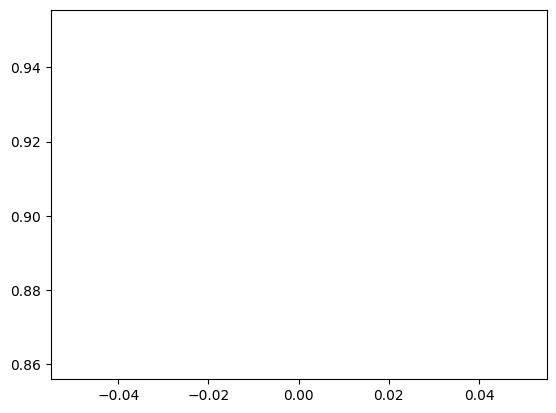

In [35]:
plt.plot(losses)
plt.show()

In [36]:
model.eval()
with torch.no_grad():
  X_new = torch.tensor([
      [10000, 2, 1],
      [20000,2, 1],
      [20000,2, 0],], dtype = torch.float32)
  X_new = (X_new - X_mean) / X_std
  prediction = model(X_new)
  prediction = (prediction * Y_std ) + Y_mean
  print(pred)

tensor([[0.0308],
        [0.1426],
        [0.2660],
        ...,
        [0.3778],
        [0.2018],
        [0.0943]], grad_fn=<AddmmBackward0>)
